# Project 1 - Fondations of deep learning

Pierre Joubrel

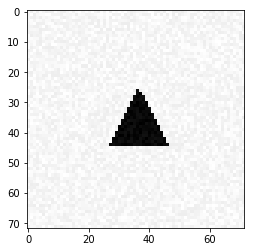

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import keras.backend as K

def custom_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def tri(Y):
    result = np.zeros([len(Y), 6])
    i = 0
    for vecteur in Y:
        U = [vecteur[0], vecteur[2], vecteur[4]]
        V = [vecteur[1], vecteur[3], vecteur[5]]
        flag = True
        while flag:
            flag = False
            if (V[1],U[1])>(V[0],U[0]):
                V[1],V[0]=V[0],V[1]
                U[1],U[0]=U[0],U[1]
                flag = True
            elif (V[2],U[2])>(V[0],U[0]):
                V[2],V[0]=V[0],V[2]
                U[2],U[0]=U[0],U[2]
                flag = True
            elif (V[2],U[2])>(V[1],U[1]):
                V[2],V[1]=V[1],V[2]
                U[2],U[1]=U[1],U[2]
                flag = True
        result[i] = [U[0], V[0], U[1], V[1], U[2], V[2]]
        i += 1
    return result

def tri_2(Y):
    result = np.zeros([len(Y), 6])
    i = 0
    for vecteur in Y:
        U = [vecteur[0], vecteur[2], vecteur[4]]
        V = [vecteur[1], vecteur[3], vecteur[5]]
        
        if (V[0]==max(V)):
            if (U[2]>U[1]):
                U = [U[0], U[2], U[1]]
                V = [V[0], V[2], V[1]]
        elif (V[1]==max(V)):
            if (U[0]>U[2]):
                U = [U[1], U[0], U[2]]
                V = [V[1], V[0], V[2]]
            else:
                U = [U[1], U[2], U[0]]
                V = [V[1], V[2], V[0]]
        else:
            if (U[1]>U[0]):
                U = [U[2], U[1], U[0]]
                V = [V[2], V[1], V[0]]
            else:
                U = [U[2], U[0], U[1]]
                V = [V[2], V[0], V[1]]
        
        result[i] = [U[0], V[0], U[1], V[1], U[2], V[2]]
        i += 1
    return result

def tri_3(Y):
    # Compare position noeuds avec droite reliant sommet le plus haut selon y et le dernier noeud
    result = np.zeros([len(Y), 6])
    i = 0
    for vecteur in Y:
        U = [vecteur[0], vecteur[2], vecteur[4]]
        V = [vecteur[1], vecteur[3], vecteur[5]]
        
        if (V[0]==max(V)):
            if (V[2]<((V[0]-V[1])/(U[0]-U[1]))*(U[2]-U[1])+V[1]):
                U = [U[0], U[2], U[1]]
                V = [V[0], V[2], V[1]]
        elif (V[1]==max(V)):
            if (V[0]<((V[1]-V[2])/(U[1]-U[2]))*(U[0]-U[2])+V[2]):
                U = [U[1], U[0], U[2]]
                V = [V[1], V[0], V[2]]
            else:
                U = [U[1], U[2], U[0]]
                V = [V[1], V[2], V[0]]
        else:
            if (V[1]<((V[2]-V[0])/(U[2]-U[0]))*(U[1]-U[0])+V[0]):
                U = [U[2], U[1], U[0]]
                V = [V[2], V[1], V[0]]
            else:
                U = [U[2], U[0], U[1]]
                V = [V[2], V[0], V[1]]
        
        result[i] = [U[0], V[0], U[1], V[1], U[2], V[2]]
        i += 1
    return result

In [4]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]


# III - Question 3 : Simple classification

In [5]:
# Creating the dataset

## Generating set of images 
[X_train, Y_train] = generate_dataset_classification(300, 20)

## Associate each image with a category
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3)
# first = square, second = circle, third = triangle

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [71]:
# Creating the model
from keras.models import Sequential
from keras.layers import Dense

model_sgd = Sequential()
model_sgd.add(Dense(3, activation='softmax'))

model_adam = Sequential()
model_adam.add(Dense(3, activation='softmax'))

# Stochastic gradient descent optimiser :
model_sgd.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Adam optimiser
model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fitting the model
model_sgd.fit(X_train, Y_train,batch_size=5, epochs=50, verbose=1)
model_adam.fit(X_train, Y_train,batch_size=5, epochs=50, verbose=1)

# The Adam classifier seems to have better than the stochastic gradient descent while testing under the same input
# values : batch size of 300 and 50 epochs : accuracy of 0.99 against 0.34 

Epoch 1/50
300/300 [==============================] - 1s 4ms/step - loss: 11.3551 - acc: 0.2767
Epoch 2/50
300/300 [==============================] - 0s 406us/step - loss: 11.3364 - acc: 0.2967
Epoch 3/50
300/300 [==============================] - 0s 401us/step - loss: 11.3364 - acc: 0.2967
Epoch 4/50
300/300 [==============================] - 0s 402us/step - loss: 11.3364 - acc: 0.2967
Epoch 5/50
300/300 [==============================] - 0s 409us/step - loss: 11.3364 - acc: 0.2967
Epoch 6/50
300/300 [==============================] - 0s 403us/step - loss: 11.3364 - acc: 0.2967
Epoch 7/50
300/300 [==============================] - 0s 400us/step - loss: 11.3364 - acc: 0.2967
Epoch 8/50
300/300 [==============================] - 0s 408us/step - loss: 11.3364 - acc: 0.2967
Epoch 9/50
300/300 [==============================] - 0s 405us/step - loss: 11.3364 - acc: 0.2967
Epoch 10/50
300/300 [==============================] - 0s 404us/step - loss: 11.3364 - acc: 0.2967
Epoch 11/50
300/300 [

In [5]:
# Checking the classifier

X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

# IV-  Question 4 : Visualisation of the Solution 

Creation of subplots which represent the columns of the weight matrix.

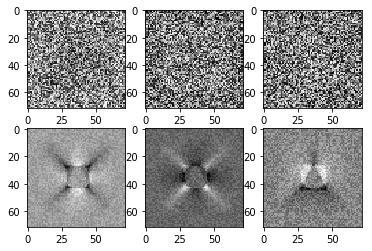

In [75]:
# plots with Stochatic gradient descent optimiser :

plt.subplot(231)
plt.imshow(model_sgd.get_weights()[0].take([0],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(232)
plt.imshow(model_sgd.get_weights()[0].take([1],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(233)
plt.imshow(model_sgd.get_weights()[0].take([2],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

# plots with adam optimiser :

plt.subplot(234)
plt.imshow(model_adam.get_weights()[0].take([0],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(235)
plt.imshow(model_adam.get_weights()[0].take([1],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(236)
plt.imshow(model_adam.get_weights()[0].take([2],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

# V - Question 5 : A more difficult classification problem 

Retraining the linear classifier on the new test set :

In [98]:
# Generation of a new training set 
[X_train_2, Y_train_2] = generate_dataset_classification(300, 20, True)
Y_train_2 = np_utils.to_categorical(Y_train_2, 3)

# Retrain with the same linear classifier

model_2 = Sequential()
model_2.add(Dense(3, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model_2.fit(X_train_2, Y_train_2, batch_size=10, epochs=50, verbose=1)

# Evaluating the classifier

[X_test_2, Y_test_2] = generate_test_set_classification()
model_2.evaluate(X_test_2, Y_test_2)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Epoch 1/50
300/300 [==============================] - 2s 6ms/step - loss: 2.0109 - acc: 0.3167
Epoch 2/50
300/300 [==============================] - 0s 307us/step - loss: 1.3964 - acc: 0.4100
Epoch 3/50
300/300 [==============================] - 0s 307us/step - loss: 1.2320 - acc: 0.4633
Epoch 4/50
300/300 [==============================] - 0s 297us/step - loss: 0.9991 - acc: 0.5533
Epoch 5/50
300/300 [==============================] - 0s 303us/step - loss: 0.8974 - acc: 0.5833
Epoch 6/50
300/300 [==============================] - 0s 307us/step - loss: 0.9408 - acc: 0.5833
Epoch 7/50
300/300 [==============================] - 0s 310us/step - loss: 0.9381 - acc: 0.5700
Epoch 8/50
300/300 [==============================] - 0s 298us/step - loss: 1.4453 - acc: 0.4733
Epoch 9/50
300/300 [==============================] - 0s 305us/step - loss: 0.8897 - acc: 0.6267
Epoch

[1.2261879483858744, 0.57]

Training a convolutional deep network on this test set: 

Value of the loss function when evaluating the model : 0.1589606722195943

In [96]:
## Creating a new training set
from keras.utils import np_utils
[X_train_3, Y_train_3] = generate_dataset_classification(300, 20, True)

X_train_3 = X_train_3.reshape(X_train_3.shape[0], 72, 72, 1)
X_train_3 = X_train_3.astype('float32')
X_train_3 /= 255

Y_train_3 = np_utils.to_categorical(Y_train_3, 3)

## Creating the convolutional deep network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
model_3 = Sequential()
model_3.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1)))
model_3.add(MaxPooling2D(pool_size=(1, 1)))
model_3.add(Dropout(0.2))

model_3.add(Flatten())
model_3.add(Dense(200, activation='relu'))

model_3.add(Dropout(0.2))
model_3.add(Dense(3, activation='softmax'))

## Training the model 

model_3.compile(loss=custom_loss,
optimizer='adam',
metrics=['accuracy'])

model_3.fit(X_train_3, Y_train_3, batch_size=50, epochs=50, verbose=1)

## Evaluating the classifier

[X_test_3, Y_test_3] = generate_test_set_classification()

X_test_3 = X_test_3.reshape(X_test_3.shape[0], 72, 72, 1)
X_test_3 = X_test_3.astype('float32')
X_test_3 /= 255

model_3.evaluate(X_test_3, Y_test_3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Epoch 1/50
300/300 [==============================] - 5s 17ms/step - loss: 0.2223 - acc: 0.2967
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.2226 - acc: 0.3467
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.2218 - acc: 0.3700
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.2212 - acc: 0.4433
Epoch 5/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2211 - acc: 0.3500
Epoch 6/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2204 - acc: 0.3467
Epoch 7/50
300/300 [==============================] - 3s 9ms/step - loss: 0.2189 - acc: 0.4667
Epoch 8/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2176 - acc: 0.4167
Epoch 9/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2153 - acc: 0.3633
Epoch 10/50
300/

[0.1589606722195943, 0.6133333325386048]

# VI - Question 6 : A regression problem

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


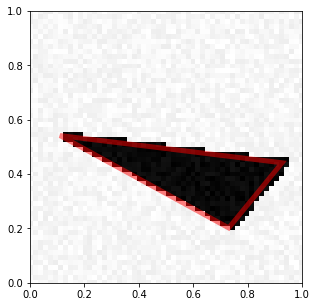

In [11]:
# Generaing the training set :

[X_train_4, Y_train_4] = generate_dataset_regression(1000, 20)

X_train_4 = X_train_4.reshape(X_train_4.shape[0], 72, 72, 1)
X_train_4 = X_train_4.astype('float32')
X_train_4 /= 255

# Normalizing Y_train using tri_2 : orders vertices from the one with highest value on the y - axis to the lowest value

Y_train_4 = tri_2(Y_train_4)

visualize_prediction(X_train_4[0], Y_train_4[0])

In [46]:
# Creating the convolutional deep network

# The network is built with 4 convolutional layers, and a fully connected layer with 3 hidden layers

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Dropout, Activation
from keras.layers import Flatten
from keras.optimizers import Adam

model4 = Sequential()


model4.add(Conv2D(8, (5, 5), padding='same',activation = 'relu', input_shape=(72, 72, 1,)))
model4.add(MaxPooling2D(pool_size=(2,2),strides=2))
model4.add(Conv2D(16, (5, 5), padding='same',activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2),strides=2))
model4.add(Conv2D(32, (5, 5), padding='same',activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2),strides=2))
model4.add(Conv2D(32, (5, 5), padding='same',activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2),strides=2))

model4.add(Flatten())

model4.add(Dense(128, activation='relu', kernel_initializer= 'normal'))
model4.add(Dense(64, activation='relu', kernel_initializer= 'normal'))
model4.add(Dense(16, activation='relu', kernel_initializer= 'normal'))
model4.add(Dense(6, activation='sigmoid', kernel_initializer= 'normal'))

opt = Adam(lr=0.001)

model4.compile(loss= custom_loss , optimizer=opt ,
 metrics=[ 'accuracy' ])

# Fitting the model 
model4.fit(X_train_4, Y_train_4, batch_size=10, epochs=50, verbose=1)

Epoch 1/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0646 - acc: 0.4770
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0598 - acc: 0.4770
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0599 - acc: 0.4770
Epoch 4/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0595 - acc: 0.4770
Epoch 5/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0586 - acc: 0.4770
Epoch 6/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0541 - acc: 0.5000
Epoch 7/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0365 - acc: 0.6500
Epoch 8/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0319 - acc: 0.6550A: 2
Epoch 9/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0280 - acc: 0.6540
Epoch 10/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0236 - acc: 0.6920
Epoch 11/50
1000/1000 [

In [47]:
# Generating the test set :
[X_test_4, Y_test_4] = generate_test_set_regression()

X_test_4 = X_test_4.reshape(X_test_4.shape[0], 72, 72, 1)
X_test_4 = X_test_4.astype('float32')
X_test_4 /= 255

Y_test_4 = tri_2(Y_test_4)

# Evaluating the model 
model4.evaluate(X_test_4, Y_test_4)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 2s 6ms/step


[0.005677954194446405, 0.8466666666666667]

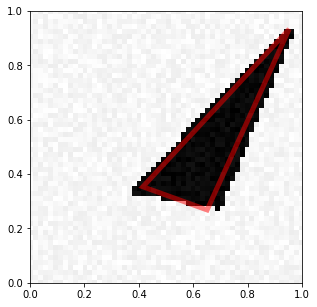

In [49]:
# Plotting the output of the model 
test = model4.predict(X_test_4)
test = tri_2(test)

ind = 0
visualize_prediction(X_test_4[ind], test[ind])

# VII - Question 7 : image denoising 

Modifying the generate_a_* functions
 

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing_noise(figsize, U, V, noise):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    plt.close(fig)
    return imdata

def generate_a_rectangle_noise(noise, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    imdata = generate_a_drawing(figsize, U, V, 0.0)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    return [imdata_noise, imdata]


def generate_a_disk_noise(noise, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    imdata = generate_a_drawing(figsize, U, V, 0.0)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    return [imdata_noise, imdata]

def generate_a_triangle_noise(noise, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, 0.0)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    return [imdata_noise, imdata]

def generate_dataset_classification_noise(nb_samples, noise, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            [X[i], Y[i]] = generate_a_rectangle_noise(noise, free_location)
        elif category == 1: 
            [X[i], Y[i]] = generate_a_disk_noise(noise, free_location)
        else:
            [X[i], Y[i]] = generate_a_triangle_noise(noise, free_location)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

Training an hourglass network on the dataset 

In [34]:
# Generating and reshaping the training set :

[X_train_5, Y_train_5] = generate_dataset_classification_noise(1000, 20, True)

X_train_5 = X_train_5.reshape(X_train_5.shape[0], 72, 72, 1)
X_train_5 = X_train_5.astype('float32')
X_train_5 /= 255

Y_train_5 = Y_train_5.reshape(Y_train_5.shape[0], 72, 72, 1)
Y_train_5 = Y_train_5.astype('float32')
Y_train_5 /= 255

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [36]:
# Implementing an hourglass network : 

from keras.layers import UpSampling2D, ZeroPadding2D

model_5= Sequential()

model_5.add(Conv2D(8, (7, 7), padding='same',activation = 'relu', input_shape=(72, 72, 1,)))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(8, (7, 7), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(MaxPooling2D(pool_size=(2,2),strides=2))

model_5.add(Conv2D(16, (5, 5), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(16, (5, 5), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(MaxPooling2D(pool_size=(2,2),strides=2))

model_5.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(MaxPooling2D(pool_size=(2,2),strides=2))

model_5.add(UpSampling2D(size = (2,2)))
model_5.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))

model_5.add(UpSampling2D(size = (2,2)))
model_5.add(Conv2D(16, (5, 5), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(16, (5, 5), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))

model_5.add(UpSampling2D(size = (2,2)))
model_5.add(Conv2D(8, (7, 7), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))
model_5.add(Conv2D(8, (7, 7), padding='same',activation = 'relu'))
model_5.add(BatchNormalization())
model_5.add(Activation(activation = "relu"))

model_5.add(Conv2D(1, (1, 1), padding='valid',activation = 'sigmoid'))

model_5.compile(optimizer = 'adam',loss = custom_loss,metrics=[ 'accuracy' ])

model_5.fit(X_train_5, Y_train_5, batch_size=10, epochs=25, verbose=1)

Epoch 1/25
1000/1000 [==============================] - 95s 95ms/step - loss: 0.0859 - acc: 0.9626
Epoch 2/25
1000/1000 [==============================] - 87s 87ms/step - loss: 0.0286 - acc: 0.9864
Epoch 3/25
1000/1000 [==============================] - 88s 88ms/step - loss: 0.0160 - acc: 0.9899
Epoch 4/25
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0103 - acc: 0.9923
Epoch 5/25
1000/1000 [==============================] - 109s 109ms/step - loss: 0.0077 - acc: 0.9934
Epoch 6/25
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0060 - acc: 0.9945
Epoch 7/25
1000/1000 [==============================] - 93s 93ms/step - loss: 0.0047 - acc: 0.9955
Epoch 8/25
1000/1000 [==============================] - 79s 79ms/step - loss: 0.0039 - acc: 0.9961
Epoch 9/25
1000/1000 [==============================] - 84s 84ms/step - loss: 0.0037 - acc: 0.9961
Epoch 10/25
1000/1000 [==============================] - 85s 85ms/step - loss: 0.0029 - acc: 0.9970
Epo

In [37]:
# Generating an reshaping the test set :

[X_test_5, Y_test_5] = generate_dataset_classification_noise(300, 20, True)

X_test_5 = X_test_5.reshape(X_test_5.shape[0], 72, 72, 1)
X_test_5 = X_test_5.astype('float32')
X_test_5 /= 255

Y_test_5 = Y_test_5.reshape(Y_test_5.shape[0], 72, 72, 1)
Y_test_5 = Y_test_5.astype('float32')
Y_test_5 /= 255

# Evaluating the model 

model_5.evaluate(X_test_5, Y_test_5)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 10s 33ms/step


[0.0021091694555555782, 0.9972151470184326]

Text(0.5,1,'Noisy picture')

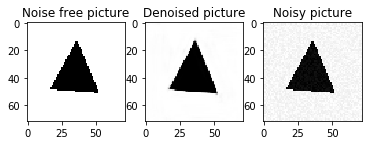

In [45]:
# Visualising the output of the denoising network :

t = X_train_5[2].reshape(1,72,72,1)
result = model_5.predict(t)

# First plot : noise free picture, Second : picture denoised through the network, third : noisy picture 

plt.subplot(131)
plt.imshow(Y_train_5[2].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Noise free picture")

plt.subplot(132)
plt.imshow(result.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Denoised picture")

plt.subplot(133)
plt.imshow(X_train_5[2].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Noisy picture")